<a href="https://colab.research.google.com/github/RoseSarlake/Computer-Vision/blob/main/CV_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt



# Part 1

A) Compute discrete masks of the Gaussian and the normalized first and second derivatives of the Gaussian, all in case 1D. Consider both the size of the mask and the sigma value as possible inputs. Draw the masks as 1D graphs and compare your plots with the mask obtained given by OpenCV’s getDerivKernels function for the same mask size. Shows examples with different mask sizes.

1. Generate Gaussian kernel, the size and sigma can be input

In [14]:
def My_Gaussian(size,sigma):
  w = size 
  hw = (w-1)/2
  sum = 0
  g = np.zeros(w)
  for i in range(0,w):
    # The continuous normalization factor can be ignored since it disappears in the discrete normalization step
    g[i] = math.exp(-((i-hw)*(i-hw))/(2*sigma*sigma))
    sum += g[i]
  for i in range(0,w):
    g[i] /= sum
  return g

2. Generate Gaussian derivatives kernel, the size and sigma can be input

In [15]:
def My_Gaussian_d(size,sigma):
  w = size 
  hw = (w-1)/2
  sum = 0
  gp = np.zeros(w)
  for i in range(0,w):
    # Normalization for differentiating kernels is different from normalization for Gaussian kernels
    gp[i] = -(i-hw)*math.exp(-((i-hw)*(i-hw))/(2*sigma*sigma))
    sum += i*gp[i]
  for i in range(0,w):
    gp[i] /= sum
  return gp

3. Comparation using getDerivKernels

(1) Gaussian kernel

[0.05448868 0.24420134 0.40261995 0.24420134 0.05448868]
[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]


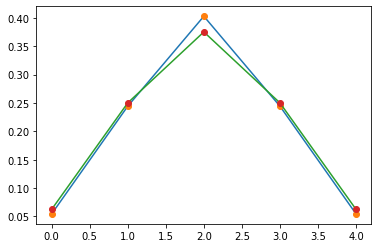

In [17]:
k1_g_my1=My_Gaussian(5,1)
print(k1_g_my1)
plt.plot(k1_g_my1)
plt.plot(k1_g_my1,"o")

k1_gp_py1 = cv2.getDerivKernels(1,0,5,normalize= True)
print(k1_gp_py1[1])
plt.plot(k1_gp_py1[1])
plt.plot(k1_gp_py1[1],"o")

[1.33830625e-04 4.43186162e-03 5.39911274e-02 2.41971446e-01
 3.98943469e-01 2.41971446e-01 5.39911274e-02 4.43186162e-03
 1.33830625e-04]
[[0.00390625]
 [0.03125   ]
 [0.109375  ]
 [0.21875   ]
 [0.2734375 ]
 [0.21875   ]
 [0.109375  ]
 [0.03125   ]
 [0.00390625]]


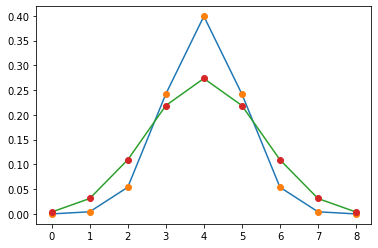

In [19]:
k1_g_my2=My_Gaussian(9,1)
print(k1_g_my2)
plt.plot(k1_g_my2)
plt.plot(k1_g_my2,"o")

k1_gp_py2 = cv2.getDerivKernels(1,0,9,normalize= True)
print(k1_gp_py2[1])
plt.plot(k1_gp_py2[1])
plt.plot(k1_gp_py2[1],"o")

(2) Gaussian derivatives kernel

[-0.11790104 -0.26419791  0.          0.26419791  0.11790104]
[[-0.125]
 [-0.25 ]
 [ 0.   ]
 [ 0.25 ]
 [ 0.125]]


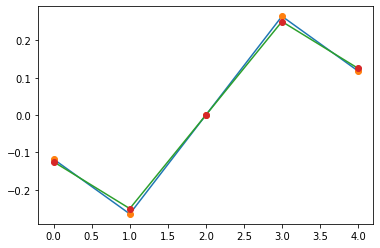

In [20]:
k1_gp_my1=My_Gaussian_d(5,1)
print(k1_gp_my1)
plt.plot(k1_gp_my1)
plt.plot(k1_gp_my1,"o")
k1_gp_py1 = cv2.getDerivKernels(0,1,5, normalize= True)
print(k1_gp_py1[1])
plt.plot(k1_gp_py1[1])
plt.plot(k1_gp_py1[1],"o")

[-0.00053536 -0.01329654 -0.10799003 -0.24198887  0.          0.24198887
  0.10799003  0.01329654  0.00053536]
[[-0.0078125]
 [-0.046875 ]
 [-0.109375 ]
 [-0.109375 ]
 [ 0.       ]
 [ 0.109375 ]
 [ 0.109375 ]
 [ 0.046875 ]
 [ 0.0078125]]


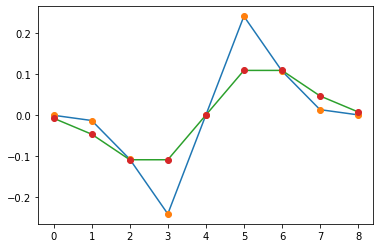

In [21]:
k1_gp_my2=My_Gaussian_d(9,1)
print(k1_gp_my2)
plt.plot(k1_gp_my2)
plt.plot(k1_gp_my2,"o")

k1_gp_py2 = cv2.getDerivKernels(0,1,9, normalize= True)
print(k1_gp_py2[1])
plt.plot(k1_gp_py2[1])
plt.plot(k1_gp_py2[1],"o")

B) Compare the masks outputted by the call cv2.getDerivKernels(0,1,9) with the masks obtained from the binomial approximation to the Gaussian function. For it, assume [-1,1] as the mask to compute first-derivative.

1. binomial approximation and comparation

In [22]:
def My_binomial(n):
  s = []
  for i in range(1, n+1): 
    # first value in a line is always 1 
    C = 1
    for j in range(1, i+1): 
      # using Binomial Coefficient 
      s.append(C)
      C = C * (i - j) // j 
  return s[-n:]


[1, 8, 28, 56, 70, 56, 28, 8, 1]
[[ 1.]
 [ 8.]
 [28.]
 [56.]
 [70.]
 [56.]
 [28.]
 [ 8.]
 [ 1.]]


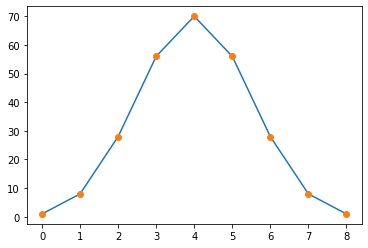

In [23]:
k2_b_my = My_binomial(9)
print(k2_b_my)
plt.plot(k2_b_my)
k2_b_py = cv2.getDerivKernels(0,1,9)
print(k2_b_py[0])
plt.plot(k2_b_py[0],"o")

2. First-derivative (assume [-1,1] as the mask)

[ -1  -7 -20 -28 -14  14  28  20   7   1]
[[ -1.]
 [ -6.]
 [-14.]
 [-14.]
 [  0.]
 [ 14.]
 [ 14.]
 [  6.]
 [  1.]]


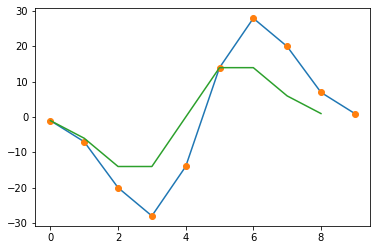

In [24]:
k2_bp_my = np.convolve(k2_b_my, [-1,1])
print(k2_bp_my)
plt.plot(k2_bp_my)
plt.plot(k2_bp_my,"o")
k2_bp_py = cv2.getDerivKernels(0,1,9)
print(k2_bp_py[1])
plt.plot(k2_bp_py[1])

C) Calculate the convolution of a finite row vector with a 1D mask (Gaussian or Gaussian derivative) both of known dimension. Apply border models (copy and mirror). Use your functions from (A)

1. Gaussian with mirror border (REFLECT)

[0.05448868 0.35317871 1.10897737 2.35317871 4.         5.5923326
 6.5923326  7.         7.4076674  8.35317871 9.04744576 7.30674231
 3.23110161 0.59937553]
[[0.3531787 ]
 [0.05448868]
 [0.05448868]
 [0.3531787 ]
 [1.1089773 ]
 [2.3531787 ]
 [4.        ]
 [5.592333  ]
 [6.592333  ]
 [7.        ]
 [7.407667  ]
 [8.353179  ]
 [9.047445  ]
 [7.306742  ]
 [3.2311015 ]
 [0.59937555]
 [0.59937555]
 [3.2311015 ]]


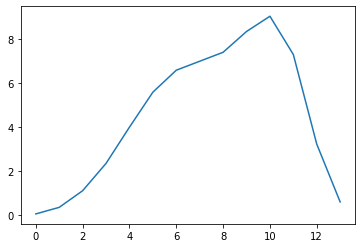

In [25]:
My_row = [1,2,4,6,7,7,7,8,10,11]
k3_g_k = My_Gaussian(5,1)
k3_g_con = np.convolve(My_row,k3_g_k)
print(k3_g_con)
plt.plot(k3_g_con)
k3_g_mirror = cv2.copyMakeBorder(np.float32(k3_g_con),2,2,0,0,cv2.BORDER_REFLECT)
print(k3_g_mirror)

2. Gaussian derivative with copy border (REPLICATE)

[-0.11790104 -0.5        -1.         -1.5        -1.76419791 -1.38209896
 -0.61790104 -0.23580209 -0.61790104 -1.26419791  0.03271358  3.58518747
  4.08518747  1.29691149]
[[-0.11790104]
 [-0.11790104]
 [-0.11790104]
 [-0.5       ]
 [-1.        ]
 [-1.5       ]
 [-1.764198  ]
 [-1.3820989 ]
 [-0.617901  ]
 [-0.23580208]
 [-0.617901  ]
 [-1.264198  ]
 [ 0.03271358]
 [ 3.5851874 ]
 [ 4.0851874 ]
 [ 1.2969115 ]
 [ 1.2969115 ]
 [ 1.2969115 ]]


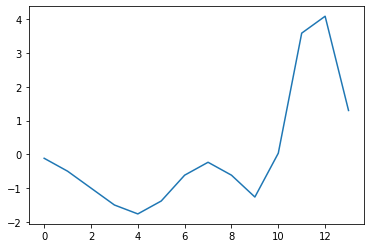

In [26]:
k3_gp_k = My_Gaussian_d(5,1)
k3_gp_con = np.convolve(My_row,k3_gp_k)
print(k3_gp_con)
plt.plot(k3_gp_con)
k3_gp_copy = cv2.copyMakeBorder(np.float32(k3_gp_con),2,2,0,0,cv2.BORDER_REPLICATE)
print(k3_gp_copy)

D) Compute the convolution of an image with a 2D square Gaussian mask using its functions from A. Compare yours results with the output of OpenCV’s GaussianBlur function for the same mask size. (Hint: Apply the separability of Gaussian masks)

1. Convelution function (with padding parameter)

In [174]:
def My_convolve2D(image, kernel, padding=0):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int((xImgShape - xKernShape + 2 * padding) + 1)
    yOutput = int((yImgShape - yKernShape + 2 * padding) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply mirror padding
    if padding != 0:
        imagePadded = cv2.copyMakeBorder(image,padding,padding,padding,padding,cv2.BORDER_REFLECT)
        #print(imagePadded)
    else:
        imagePadded = image

    # Convolution
    for y in range(image.shape[1]):
        for x in range(image.shape[0]):
          output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
    return output

2. Compare with GaussianBlur function

oringinal image (grayscale)


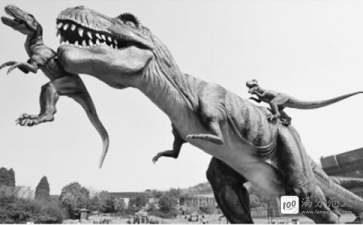

my result:


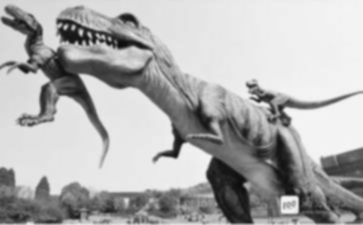

GaussianBlur function result:


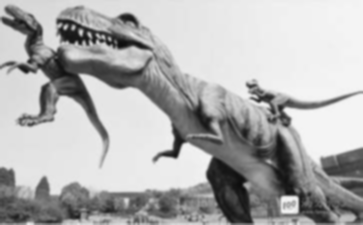

In [175]:
imgD = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinoreal.jpg")
imgd = cv2.cvtColor(imgD,cv2.COLOR_BGR2GRAY) 
print("oringinal image (grayscale)")
cv2_imshow(imgd)

orik = My_Gaussian(5,1)
transk = orik.reshape(orik.shape[0],1)
k4_g_my = orik*transk
img4_my = My_convolve2D(imgd,k4_g_my,padding=2)
print("my result:")
cv2_imshow(img4_my)

img4_py = cv2.GaussianBlur(imgd,(5,5),0)
print("GaussianBlur function result:")
cv2_imshow(img4_py)

E) Compute the 3x3 normalized Laplacian of Gaussian mask (assume sigma=0.8). Compare your result with the mask given by the Discrete Diffusion Equation for some gamma value.
Use your functions from (A).

In [124]:
def calLoG(x,y,sigma):
  #nom = ((y**2)+(x**2)-2*(sigma**2))
  #denom = ((2*math.pi*(sigma**6)))
  #expo = math.exp(-((x**2)+(y**2))/(2*(sigma**2)))
  #return nom*expo/denom
  
  return ((x*x+y*y-2*sigma*sigma)/sigma**4) * math.exp(-(x*x+y*y)/2*sigma*sigma)
  #return (1/math.pi*sigma*sigma) * (((x*x+y*y)/2*sigma*sigma)-1) * math.exp(-(x*x+y*y)/2*sigma*sigma)
  #return ((x**2)+(y**2)-2*(sigma**2)) / (sigma**4) * math.exp(-(x*x+y*y)/2*sigma*sigma)

In [125]:
def My_Lapacian(size,sigma):
  matrix = [[0] * size for i in range(size)]
  for i in range(size):
    for j in range(size):
      matrix[i][j] = calLoG(i-(size-1)/2,j-(size-1)/2,sigma)
  return matrix
 
x = My_Lapacian(3,0.8)
print(x)
 
a = sum(sum(x,[]))
print(a)
for line in x:
  print(line)

[[0.9268812141381708, -0.49639094331209366, 0.9268812141381708], [-0.49639094331209366, -3.125, -0.49639094331209366], [0.9268812141381708, -0.49639094331209366, 0.9268812141381708]]
-1.4030389166956916
[0.9268812141381708, -0.49639094331209366, 0.9268812141381708]
[-0.49639094331209366, -3.125, -0.49639094331209366]
[0.9268812141381708, -0.49639094331209366, 0.9268812141381708]


oringinal image (grayscale)


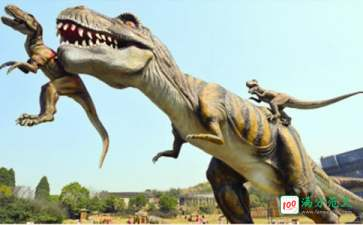

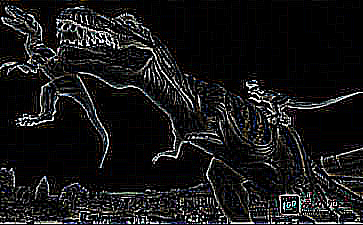

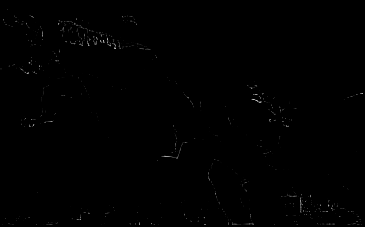

In [126]:
imge = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinoreal.jpg")
#imge = cv2.cvtColor(imgE,cv2.COLOR_BGR2GRAY) 
print("oringinal image (grayscale)")
cv2_imshow(imge)
k5_log_py = cv2.Laplacian(imge, cv2.CV_16S, ksize=3)
cv2_imshow(k5_log_py)
k5_log_my = My_convolve2D(imgd,x,padding=2)
cv2_imshow(k5_log_my)

# Part 2

A) A function to sample an image with factors 2n, n=1,2,3,4.

In [136]:
def My_sampling(img,n):
  #re_img = cv2.resize(img,(img2a.shape[1],img2a.shape[0]),fx=2**n,fy=2**n,interpolation = cv2.INTER_CUBIC)
  re_img = cv2.resize(img,None,fx=2**n,fy=2**n,interpolation = cv2.INTER_CUBIC)
  return re_img

oringinal image


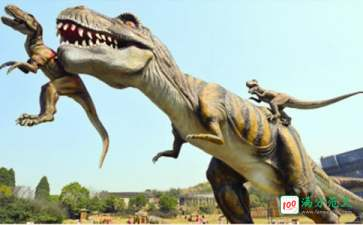

resamping imgage


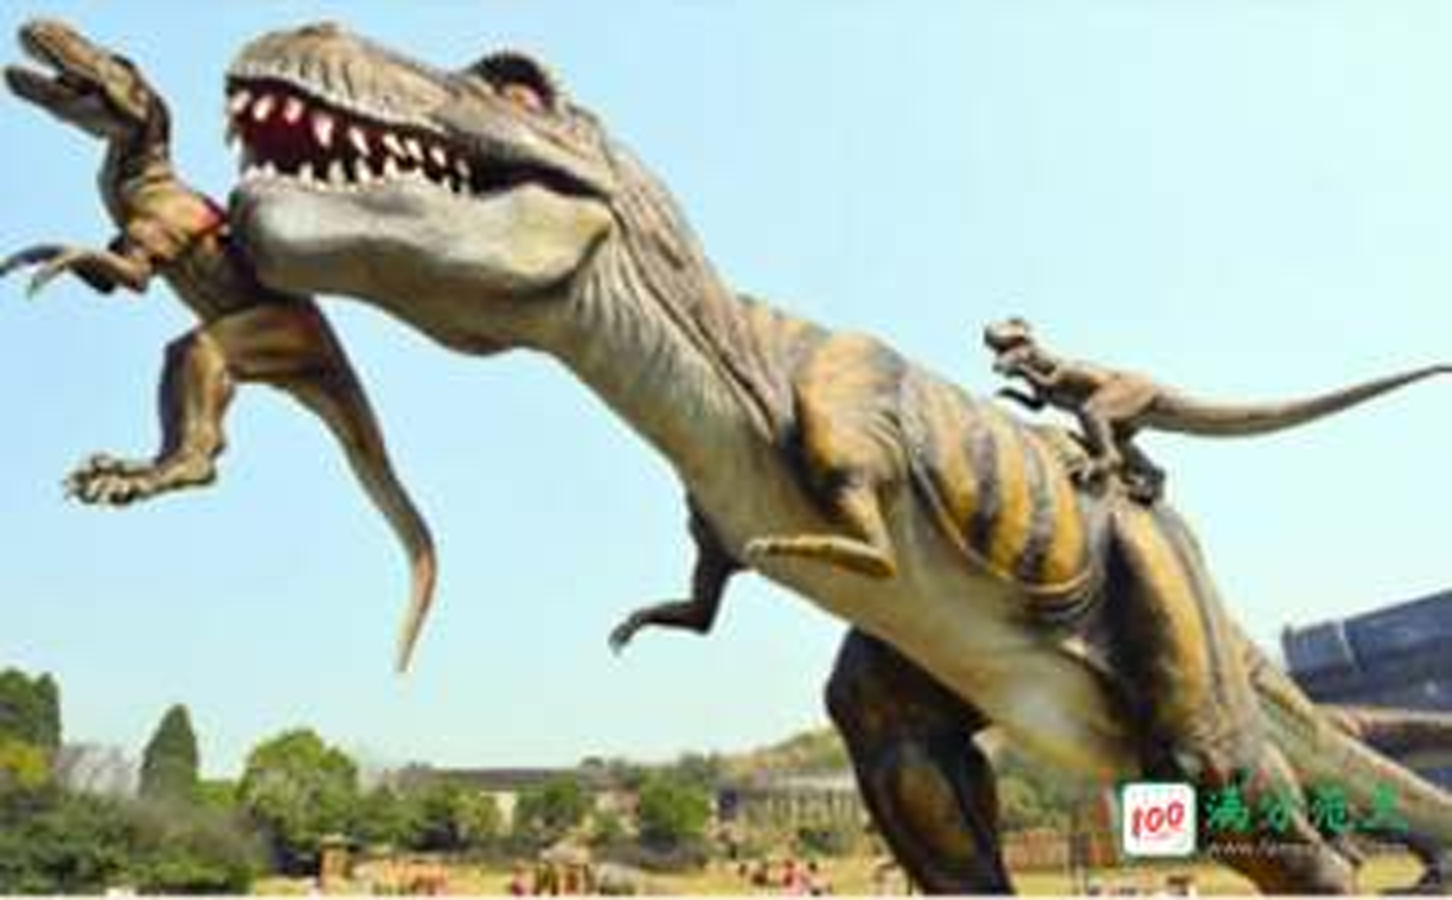

In [155]:
img2a = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinoreal.jpg")

print("oringinal image")
cv2_imshow(img2a)
img2a_1_my = My_sampling(img2a,2)
print("resamping imgage")
cv2_imshow(img2a_1_my)


B) Calculate a 4-level Gaussian pyramid representation of an image. Show examples with at least two images using mirrored edges. Compare your result with the result of using OpenCV's pyrUp () function for the same parameters. Shows all the levels of the pyramid in a single image.

1. My solution using My_samping and My_convolution and my Gaussian kernel

In [181]:
def My_pyrm(img,time):
  imgset = [img]
  for i in range(0,time):
    tem = My_convolve2D(img,k4_g_my,padding=2)
    new = My_sampling(img,i+1)
    imgset.append(new)
  return imgset

2. Using Opencv pryUp()

In [160]:
def Up_py(img,time):
  imgset = [img]
  for i in range(time):
    new = cv2.pyrUp(imgset[i],cv2.BORDER_REFLECT)
    imgset.append(new)
  return imgset

3. Comparation

Text(0.5, 1.0, 'Upsampled level 3')

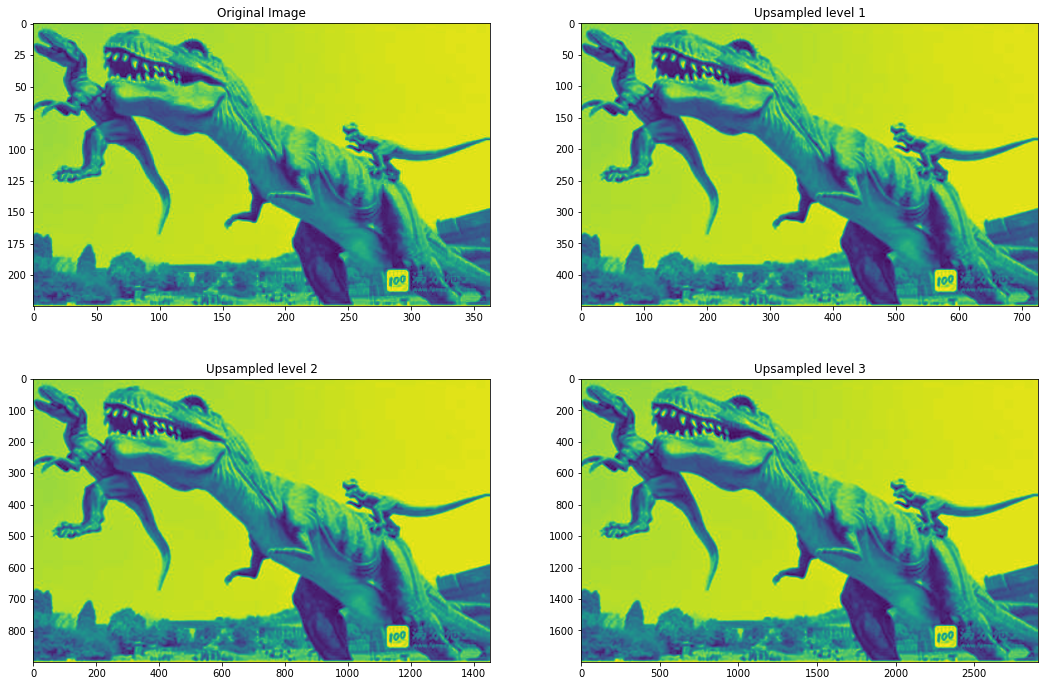

In [188]:
img2b = cv2.cvtColor(img2a,cv2.COLOR_BGR2GRAY)
img2b_my = My_pyrm(img2b,4)

plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img2b_my[0])
plt.title('Original Image')

plt.subplot(222)
plt.imshow(img2b_my[1])
plt.title('Upsampled level 1')
plt.subplot(223)
plt.imshow(img2b_my[2])
plt.title('Upsampled level 2')
plt.subplot(224)
plt.imshow(img2b_my[3])
plt.title('Upsampled level 3')

Text(0.5, 1.0, 'Upsampled level 3')

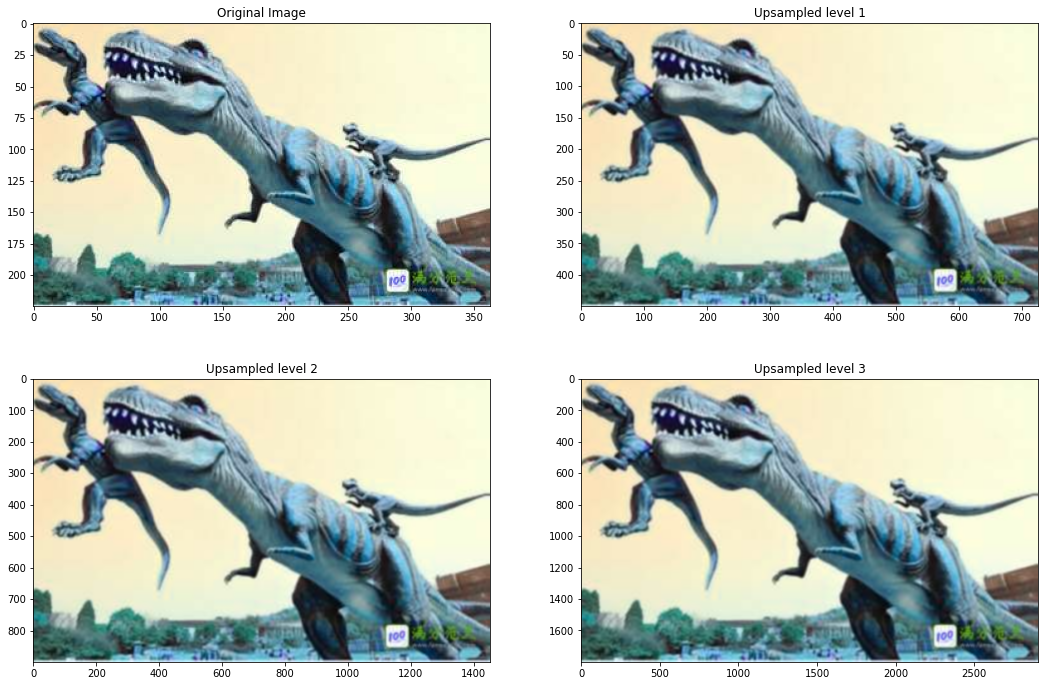

In [189]:
img2b_py = Up_py(img2a,4)

plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img2b_py[0])
plt.title('Original Image')

plt.subplot(222)
plt.imshow(img2b_py[1])
plt.title('Upsampled level 1')
plt.subplot(223)
plt.imshow(img2b_py[2])
plt.title('Upsampled level 2')
plt.subplot(224)
plt.imshow(img2b_py[3])
plt.title('Upsampled level 3')

C) Build up Lowe's pyramid scale space. Show examples with at least three different pictures. Show each octave in a different image.

D) Implement a 4-level Laplacian pyramid. Verify that an exact copy of the original image can be computed. Show examples using replicated edges. Show all the levels of the pyramid in a single image.

3.- BONUS (optional)( 2 points) : Could you think of more efficient algorithms for 2D convolution than applying 1D convolution by rows and columns? (Hint: Matrices in NumPy can compute vector operations)